<a href="https://colab.research.google.com/github/aldnoahh/speechmodal/blob/master/Speech_Mk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries

In [0]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os

In [10]:
#from google.colab import drive
#drive.mount('/gdrive')
#!unzip /gdrive/My Drive/FILES.zip -d /home
#!sudo mkdir /data
#!sudo apt-get install xz-utils
#!tar -xf /home/out.tar.xz

xz: (stdin): File format not recognized
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [0]:
#!wget https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1
#!mv Audio_Song_Actors_01-24.zip?download=1 Audio_Song_Actors_01-24.zip
#!unzip /content/Audio_Song_Actors_01-24.zip -d /temp1
#!sudo rm -r /temp3/Actor_*
#!sudo mkdir /data
#!sudo mkdir /temp3

#!mv  -v /temp1/* /temp3/
#!find /temp1 -type f -exec mv --backup=numbered -t /temp3 {} +
#!find /temp3 -type f | wc -l
#!sudo rm -r /data/out
#!wget https://drive.google.com/open?id=1emtNn6Dw3Eb2DTTchDc1YDpeAzymQaGZ
#from google.colab import drive
#drive.mount('/content/gdrive')
#! curl -L -o /FILES.ZIP https://drive.google.com/open?id=1emtNn6Dw3Eb2DTTchDc1YDpeAzymQaGZ
#!sudo mkdir /rocker
#!unzip /data/FILES.zip -d /rocker
#!cp -a /content/gdrive/My Drive/FILES.zip /data
#!wget https://drive.google.com/file/d/1emtNn6Dw3Eb2DTTchDc1YDpeAzymQaGZ/view
!cp /data/* /srv

In [0]:
mylist= os.listdir('/srv/')

In [142]:
type(mylist)

list

In [143]:
print(mylist[:])

['7Ne.WAV', '8An.WAV', '5Ne.WAV', '8Su.WAV', '3Ha.WAV', '5Di.WAV', '3Di.WAV', '8Sa.WAV', '6Su.WAV', '5Ha.WAV', '8Di.WAV', '5Sa.WAV', '3Fe.WAV', '1Sa.WAV', '1An.WAV', '2Di.WAV', '2Ha.WAV', '4Sa.WAV', '7Di.WAV', '6An.WAV', '8Ne.WAV', '4Fe.WAV', '2An.WAV', '9Sa.WAV', '5Fe.WAV', '7Ha.WAV', '3An.WAV', '4An.WAV', '8Ha.WAV', '8Fe.WAV', '9Su.WAV', '6Ha.WAV', '2Ne.WAV', '9Di.WAV', '1Ne.WAV', '1Su.WAV', '6Ne.WAV', '7Sa.WAV', '9Fe.WAV', '6Di.WAV', '1Ha.WAV', '4Ne.WAV', '7An.WAV', '3Sa.WAV', '4Ha.WAV', '9An.WAV', '4Di.WAV', '3Ne.WAV', '9Ne.WAV', '3Su.WAV', '2Su.WAV', '5An.WAV', '7Su.WAV', '2Fe.WAV', '5Su.WAV', '6Fe.WAV', '6Sa.WAV', '1Fe.WAV', '9Ha.WAV', '4Su.WAV', '2Sa.WAV', '1Di.WAV', '7Fe.WAV']


## Plotting the audio file's waveform and its spectrogram

In [0]:
data, sampling_rate = librosa.load('/srv/1Di.WAV')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


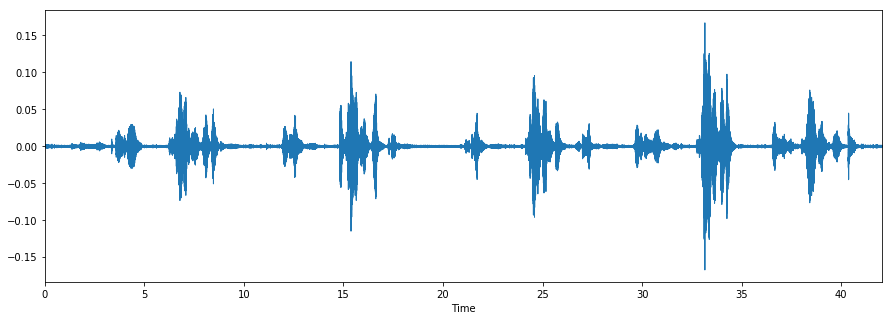

In [145]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [146]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys
"""
sr,x = scipy.io.wavfile.read('/data/3An.WAV')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)
print(len(x))

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2])) """

#plt.imshow(X.T, interpolation='nearest',
#    origin='lower',
#    aspect='auto')
#
#plt.show()

"\nsr,x = scipy.io.wavfile.read('/data/3An.WAV')\n\n## Parameters: 10ms step, 30ms window\nnstep = int(sr * 0.01)\nnwin  = int(sr * 0.03)\nnfft = nwin\n\nwindow = np.hamming(nwin)\nprint(len(x))\n\n## will take windows x[n1:n2].  generate\n## and loop over n2 such that all frames\n## fit within the waveform\nnn = range(nwin, len(x), nstep)\n\nX = np.zeros( (len(nn), nfft//2) )\n\nfor i,n in enumerate(nn):\n    xseg = x[n-nwin:n]\n    z = np.fft.fft(window * xseg, nfft)\n    X[i,:] = np.log(np.abs(z[:nfft//2])) "

## Setting the labels

In [0]:
feeling_list=[]
for item in mylist:
    if item[1:3]=='Ne':
        feeling_list.append('Neutral')
    elif item[1:3]=='Sa':
        feeling_list.append('Sadness')
    elif item[1:3]=='Su':
        feeling_list.append('Surprise')
    elif item[1:3]=='Fe':
        feeling_list.append('Fear')
    elif item[1:3]=='An':
        feeling_list.append('Anger')
    elif item[1:3]=='Di':
        feeling_list.append('Disgust')
    elif item[1:3]=='Ha':
        feeling_list.append('Happiness')
    

In [0]:
labels = pd.DataFrame(feeling_list)

In [149]:
labels[:]

,0
0,Neutral
1,Anger
2,Neutral
3,Surprise
4,Happiness
5,Disgust
6,Disgust
7,Sadness
8,Surprise
9,Happiness


## Getting the features of audio files using librosa

In [0]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
  X, sample_rate = librosa.core.load('/srv/'+ y, res_type='kaiser_fast',duration=None,sr=22500*2,offset=0.0)
  sample_rate = np.array(sample_rate)
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
  feature = mfccs
  df.loc[bookmark] = [feature]
  bookmark=bookmark+1        

In [151]:
df.size

63

In [0]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [0]:
newdf = pd.concat([df3,labels], axis=1)

In [0]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [69]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11145,11146,11147,11148,11149,11150,11151,11152,11153,11154,11155,11156,11157,11158,11159,11160,11161,11162,11163,11164,11165,11166,11167,11168,11169,11170,11171,11172,11173,11174,11175,11176,11177,11178,11179,11180,11181,11182,11183,0
0,-42.119349,-33.682939,-35.396409,-36.321173,-35.843780,-34.864338,-35.291555,-38.860759,-39.745421,-35.806875,-36.786832,-36.036604,-34.785965,-36.417095,-39.233525,-36.121597,-35.871766,-37.473236,-39.562184,-40.120767,-39.079936,-39.133316,-38.727235,-36.818789,-35.457954,-35.316579,-39.577099,-38.990270,-38.254370,-34.344928,-36.362779,-38.881191,-35.031184,-36.289832,-41.973235,-41.644053,-34.510750,-32.436836,-34.530853,-36.272596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
1,-32.352443,-34.945618,-32.909820,-32.108739,-35.053016,-30.422640,-30.298234,-31.477314,-31.585338,-31.667566,-31.028512,-29.693065,-29.006565,-27.281051,-29.549192,-30.954552,-30.656550,-31.941743,-29.382393,-28.507944,-34.214128,-31.129785,-27.159381,-23.747213,-22.182150,-21.048425,-19.047401,-18.623275,-18.863605,-17.861809,-17.679753,-18.757126,-18.014381,-17.421241,-17.459385,-16.445856,-16.871961,-17.624403,-16.957491,-16.824563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anger
2,-34.386261,-32.029158,-33.294668,-33.058448,-35.885187,-34.405205,-35.710930,-38.641104,-37.539268,-37.901225,-37.702670,-37.771468,-34.844259,-37.565893,-37.326362,-35.482075,-37.025881,-34.041071,-31.397387,-35.581301,-34.751136,-36.076397,-32.093719,-32.143031,-33.642655,-34.855719,-34.677942,-36.117289,-39.091394,-37.506095,-35.608971,-37.642752,-37.259047,-35.803544,-33.454585,-35.304548,-37.091078,-36.213286,-33.287312,-32.669935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
3,-40.520624,-37.454025,-37.865852,-39.454423,-37.595074,-35.101411,-38.622071,-39.841937,-39.619738,-38.712365,-36.242073,-34.668131,-35.662494,-38.212490,-37.374061,-39.700375,-41.126201,-37.351038,-34.040042,-37.449371,-38.265717,-39.692237,-36.414801,-36.165883,-35.307702,-38.524731,-37.393654,-36.533025,-36.922066,-35.787366,-35.304784,-36.661472,-37.197321,-37.349063,-35.104180,-35.753006,-33.750237,-38.521982,-36.821867,-35.717880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Surprise
4,-35.896892,-34.890435,-31.748055,-34.034410,-34.103072,-35.791795,-35.476570,-33.494267,-31.518931,-33.452796,-32.044261,-32.009580,-34.138647,-35.913284,-36.461223,-32.486491,-31.921391,-34.727982,-30.938102,-35.522244,-35.209433,-35.136740,-31.265190,-31.899823,-34.909005,-36.434427,-34.913675,-35.785949,-33.859586,-33.117563,-32.744416,-34.070041,-33.677016,-35.190058,-33.829024,-33.317721,-33.819915,-31.881499,-32.477871,-38.105305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happiness


In [155]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4994,4995,4996,4997,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007,5008,5009,5010,5011,5012,5013,5014,5015,5016,5017,5018,5019,5020,5021,5022,5023,5024,5025,5026,5027,5028,5029,5030,5031,5032,0
15,-34.051133,-33.963616,-34.150567,-32.774775,-31.543553,-32.784264,-34.397384,-34.915497,-34.170936,-34.962697,-33.989094,-33.618819,-32.521298,-34.494749,-31.762109,-30.861685,-30.721384,-31.978756,-32.965444,-33.961941,-35.026085,-33.273936,-32.457708,-33.459694,-32.322713,-31.456161,-32.654498,-32.438745,-33.526734,-33.118874,-32.715641,-33.980049,-32.648461,-32.607303,-32.260511,-31.731264,-32.377253,-34.296119,-34.980975,-35.219669,...,-30.055496,-31.660475,-33.243063,-32.459121,-31.43521,-31.981318,-33.834288,-33.610227,-31.763546,-31.170398,-31.202928,-28.486327,-28.095435,-28.612198,-28.819727,-28.87538,-30.151161,-27.696111,-28.589694,-30.169746,-31.675171,-31.356435,-30.340175,-29.497439,-28.245474,-28.636953,-28.910809,-30.438428,-28.905106,-27.956223,-29.286339,-30.32245,-29.48202,-29.776409,-29.65332,-30.72026,-32.748213,-31.224084,-31.719798,Disgust
27,-37.373905,-34.346231,-33.523912,-29.721695,-26.285048,-27.332172,-32.433478,-31.848105,-28.558309,-26.477582,-23.817442,-24.947792,-26.203963,-25.940419,-28.241889,-26.397110,-29.201556,-30.515444,-30.104100,-30.628056,-28.800323,-28.759574,-29.984762,-29.935400,-33.612875,-33.146801,-30.638571,-32.842600,-32.037297,-30.703507,-31.475783,-31.717160,-32.284327,-30.259579,-30.472424,-31.636229,-32.403630,-31.816076,-33.150133,-34.257630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anger
5,-32.364283,-34.146576,-34.692884,-32.197986,-31.762305,-33.225103,-34.254791,-33.917253,-33.905934,-33.896509,-34.383153,-34.934290,-32.683721,-34.152192,-34.306330,-34.331626,-35.643808,-34.103106,-32.524426,-32.769411,-31.553276,-31.437562,-32.894109,-32.039129,-33.885715,-33.456126,-31.533242,-30.942091,-32.508329,-33.529318,-33.308146,-32.293640,-32.669199,-31.977833,-33.384715,-34.303313,-35.220224,-37.340358,-36.886656,-37.439187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disgust
9,-33.295336,-32.187896,-31.084322,-31.170994,-33.828630,-33.122082,-32.561890,-30.521140,-29.625221,-31.602672,-31.587174,-31.678165,-32.271481,-30.672208,-30.622719,-31.323577,-29.980624,-30.472954,-30.822943,-31.633099,-31.742435,-31.484872,-32.665136,-32.271291,-31.094712,-31.400546,-32.538342,-33.819337,-35.665209,-35.829548,-32.544099,-31.840641,-32.602482,-32.795911,-32.834300,-31.569972,-31.309682,-31.484909,-32.175873,-31.485206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happiness
48,-32.239286,-32.626073,-32.003601,-30.939095,-31.207210,-31.418785,-31.978594,-32.066462,-32.042006,-33.521333,-35.155247,-35.378256,-35.019877,-33.843786,-33.126946,-32.681271,-30.589542,-31.108364,-31.272162,-31.449749,-31.296098,-32.553231,-33.624986,-33.895827,-33.138968,-32.776129,-33.429974,-35.504936,-35.006820,-34.261248,-33.176884,-33.399836,-34.776360,-37.009599,-37.525288,-34.934680,-34.142779,-34.733420,-32.422286,-30.754260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
62,-33.870092,-35.139914,-36.892919,-35.347275,-33.590002,-36.009489,-36.786162,-35.368493,-37.289984,-37.090661,-37.814181,-35.794921,-33.621343,-33.997960,-33.849721,-32.293226,-32.649678,-35.479535,-34.657572,-33.204950,-34.448964,-34.390118,-35.716320,-36.110519,-33.913262,-33.707992,-33.058537,-35.187042,-35.063010,-31.839596,-31.998090,-32.865129,-33.000219,-3

In [156]:
rnewdf=rnewdf.fillna(0)
rnewdf.size

317142

## Dividing the data into test and train

In [0]:
newdf1 = np.random.rand(len(rnewdf)) < 0.85
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [158]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4994,4995,4996,4997,4998,4999,5000,5001,5002,5003,5004,5005,5006,5007,5008,5009,5010,5011,5012,5013,5014,5015,5016,5017,5018,5019,5020,5021,5022,5023,5024,5025,5026,5027,5028,5029,5030,5031,5032,0
15,-34.051133,-33.963616,-34.150567,-32.774775,-31.543553,-32.784264,-34.397384,-34.915497,-34.170936,-34.962697,-33.989094,-33.618819,-32.521298,-34.494749,-31.762109,-30.861685,-30.721384,-31.978756,-32.965444,-33.961941,-35.026085,-33.273936,-32.457708,-33.459694,-32.322713,-31.456161,-32.654498,-32.438745,-33.526734,-33.118874,-32.715641,-33.980049,-32.648461,-32.607303,-32.260511,-31.731264,-32.377253,-34.296119,-34.980975,-35.219669,...,-30.055496,-31.660475,-33.243063,-32.459121,-31.43521,-31.981318,-33.834288,-33.610227,-31.763546,-31.170398,-31.202928,-28.486327,-28.095435,-28.612198,-28.819727,-28.87538,-30.151161,-27.696111,-28.589694,-30.169746,-31.675171,-31.356435,-30.340175,-29.497439,-28.245474,-28.636953,-28.910809,-30.438428,-28.905106,-27.956223,-29.286339,-30.32245,-29.48202,-29.776409,-29.65332,-30.72026,-32.748213,-31.224084,-31.719798,Disgust
27,-37.373905,-34.346231,-33.523912,-29.721695,-26.285048,-27.332172,-32.433478,-31.848105,-28.558309,-26.477582,-23.817442,-24.947792,-26.203963,-25.940419,-28.241889,-26.397110,-29.201556,-30.515444,-30.104100,-30.628056,-28.800323,-28.759574,-29.984762,-29.935400,-33.612875,-33.146801,-30.638571,-32.842600,-32.037297,-30.703507,-31.475783,-31.717160,-32.284327,-30.259579,-30.472424,-31.636229,-32.403630,-31.816076,-33.150133,-34.257630,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,Anger
5,-32.364283,-34.146576,-34.692884,-32.197986,-31.762305,-33.225103,-34.254791,-33.917253,-33.905934,-33.896509,-34.383153,-34.934290,-32.683721,-34.152192,-34.306330,-34.331626,-35.643808,-34.103106,-32.524426,-32.769411,-31.553276,-31.437562,-32.894109,-32.039129,-33.885715,-33.456126,-31.533242,-30.942091,-32.508329,-33.529318,-33.308146,-32.293640,-32.669199,-31.977833,-33.384715,-34.303313,-35.220224,-37.340358,-36.886656,-37.439187,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,Disgust
9,-33.295336,-32.187896,-31.084322,-31.170994,-33.828630,-33.122082,-32.561890,-30.521140,-29.625221,-31.602672,-31.587174,-31.678165,-32.271481,-30.672208,-30.622719,-31.323577,-29.980624,-30.472954,-30.822943,-31.633099,-31.742435,-31.484872,-32.665136,-32.271291,-31.094712,-31.400546,-32.538342,-33.819337,-35.665209,-35.829548,-32.544099,-31.840641,-32.602482,-32.795911,-32.834300,-31.569972,-31.309682,-31.484909,-32.175873,-31.485206,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,Happiness
48,-32.239286,-32.626073,-32.003601,-30.939095,-31.207210,-31.418785,-31.978594,-32.066462,-32.042006,-33.521333,-35.155247,-35.378256,-35.019877,-33.843786,-33.126946,-32.681271,-30.589542,-31.108364,-31.272162,-31.449749,-31.296098,-32.553231,-33.624986,-33.895827,-33.138968,-32.776129,-33.429974,-35.504936,-35.006820,-34.261248,-33.176884,-33.399836,-34.776360,-37.009599,-37.525288,-34.934680,-34.142779,-3

In [0]:
trainfeatures = train.iloc[:, :-1]

In [0]:
trainlabel = train.iloc[:, -1:]

In [0]:
testfeatures = test.iloc[:, :-1]

In [0]:
testlabel = test.iloc[:, -1:]

In [163]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [164]:
y_train

array([[0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
 

In [165]:
X_train.shape

(53, 5033)

## Changing dimension for CNN model

In [0]:
keras.backend.clear_session()

In [0]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [0]:
keras.backend.clear_session()
model = Sequential()

model.add(Conv1D(256, 5,padding='same', input_shape=(5033,1)))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))

model.add(Dropout(0.1))

model.add(MaxPooling1D(pool_size=(8)))


model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))


model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(7))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [189]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 5033, 256)         1536      
_________________________________________________________________
activation_1 (Activation)    (None, 5033, 256)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5033, 128)         163968    
_________________________________________________________________
activation_2 (Activation)    (None, 5033, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5033, 128)         0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 629, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 629, 128)          82048     
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [192]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=1, epochs=70, validation_data=(x_testcnn, y_test))

ValueError: ignored

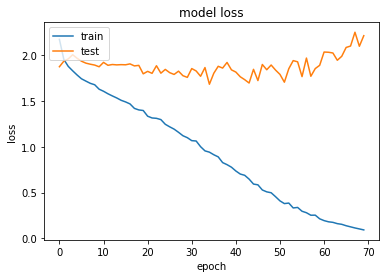

In [95]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [96]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), '/saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /saved_models/Emotion_Voice_Detection_Model.h5 


In [0]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [98]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 25.00%


## Predicting emotions on the test data

In [99]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

16/16 [==============================] - 0s 5ms/step


In [100]:
preds

array([[2.45128939e-09, 4.74427044e-01, 5.25469959e-01, 1.93954861e-06,
        1.70997811e-08, 7.39862735e-05, 2.70343007e-05],
       [9.93628651e-02, 2.04543164e-03, 7.00039864e-01, 1.42796069e-01,
        3.94052751e-02, 5.47226798e-03, 1.08782342e-02],
       [1.07925507e-05, 2.98318356e-01, 1.57206923e-01, 8.47394243e-02,
        3.52055758e-05, 3.74978385e-03, 4.55939591e-01],
       [1.21624164e-01, 1.48089873e-02, 4.52794701e-01, 9.28763002e-02,
        1.02458984e-01, 1.16165370e-01, 9.92714316e-02],
       [2.10551962e-01, 1.24198501e-03, 2.02853128e-01, 2.17692200e-02,
        5.56040525e-01, 2.78454344e-03, 4.75859083e-03],
       [1.03723899e-01, 1.64204136e-01, 2.04917878e-01, 2.56310582e-01,
        5.75084947e-02, 5.64006157e-02, 1.56934410e-01],
       [2.83612430e-01, 5.08846119e-02, 3.47625434e-01, 6.04299642e-02,
        7.47472569e-02, 1.00470781e-01, 8.22295174e-02],
       [2.23224405e-02, 8.49445090e-02, 1.37838125e-02, 1.71839342e-01,
        8.02503899e-02, 1

In [0]:
preds1=preds.argmax(axis=1)

In [102]:
preds1

array([2, 2, 6, 2, 4, 3, 2, 6, 6, 3, 5, 3, 2, 2, 4, 3])

In [0]:
abc = preds1.astype(int).flatten()

In [0]:
predictions = (lb.inverse_transform((abc)))

In [105]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,Fear
1,Fear
2,Surprise
3,Fear
4,Neutral
5,Happiness
6,Fear
7,Surprise
8,Surprise
9,Happiness


In [0]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [107]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,Fear
1,Neutral
2,Surprise
3,Disgust
4,Anger
5,Surprise
6,Sadness
7,Anger
8,Disgust
9,Sadness


In [0]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [112]:
finaldf[:]

,actualvalues,predictedvalues
0,Fear,Fear
1,Neutral,Fear
2,Surprise,Surprise
3,Disgust,Fear
4,Anger,Neutral
5,Surprise,Happiness
6,Sadness,Fear
7,Anger,Surprise
8,Disgust,Surprise
9,Sadness,Happiness


In [111]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
Anger,2
Disgust,2
Fear,1
Happiness,2
Neutral,1
Sadness,4
Surprise,4


In [0]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,55
female_calm,33
female_fearful,39
female_happy,25
female_sad,31
male_angry,48
male_calm,29
male_fearful,47
male_happy,30


In [0]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

#### The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [0]:
data, sampling_rate = librosa.load('/saved_models/output10.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


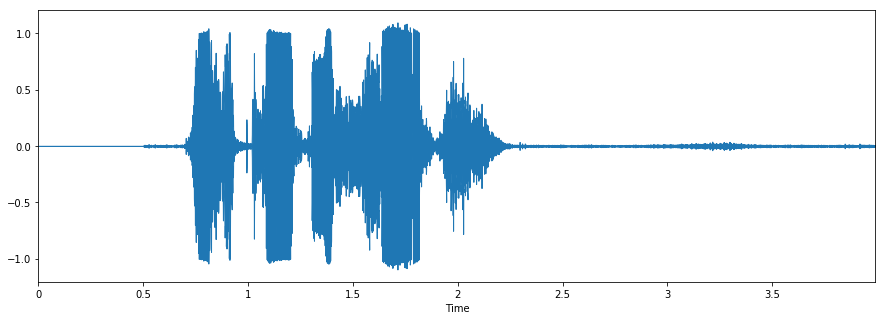

In [0]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [0]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

FileNotFoundError: ignored

In [0]:
livedf2= pd.DataFrame(data=livedf2)

In [0]:
livedf2 = livedf2.stack().to_frame().T

In [0]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-18.203564,-21.471836,-22.52221,-21.712259,-22.264288,-20.707904,-21.726444,-21.76865,-24.302736,-22.250634,...,-24.273819,-24.639939,-24.929152,-24.43919,-25.210171,-24.740646,-22.311913,-22.579805,-22.31466,-21.552436


In [0]:
twodim= np.expand_dims(livedf2, axis=2)

In [0]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s


In [0]:
livepreds

array([[  9.24052530e-22,   0.00000000e+00,   3.62402176e-26,
          1.30680162e-36,   4.47264152e-28,   1.00000000e+00,
          1.80208343e-30,   2.76873961e-27,   3.62227194e-23,
          1.67396652e-11]], dtype=float32)

In [0]:
livepreds1=livepreds.argmax(axis=1)

In [0]:
liveabc = livepreds1.astype(int).flatten()

In [0]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_angry'], dtype=object)